### Hi, let check out this dataset

#### Here is what I gonna do 

1. Check the dataset description from source - Just get more information, I dont trust them. lol
2. Listen to the data by myself => Avoid me making some dumb assumptions
3. Check label + verify some basic assumption about train - test - val.
4. Plot some audios in raw and spectrogram form, etc => To think of a good representation for this
5. Ask some questions and try to answer it or design an experiment to answer it.

In [1]:
import torch
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from torchaudio.datasets import SPEECHCOMMANDS

import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

import glob
from pathlib import Path
import random
from IPython.display import Audio, display
from ipywidgets import widgets

from utils.visualize_utils import log_specgram, plot_audio

### Dataset description -- SpeechCommands V1
#### References
- [Official release](https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html)  
- [Huggning face description](https://huggingface.co/datasets/speech_commands)
- [Torch dataset api](https://pytorch.org/audio/stable/datasets.html#speechcommands)


#### Extracted info
1. Data set created by thousands of different people, contributed by members of the public through the AIY website
2. The dataset has 65,000 one-second long utterances of 30 short words
3. Dataset is in English
4. Dataset include some common words(yes, no, etc)
5. There are unknown class contain random words
6. There are silence class contain only background noise

In [2]:
# download dataset
_ = SPEECHCOMMANDS("./data", download=True, url='speech_commands_v0.01')
source_data_path = Path('data/SpeechCommands/speech_commands_v0.01')

### Let's listen to some audio samples

In [3]:
audio_files = list(source_data_path.glob('**/*.wav'))
audio_widgets = []
for file in random.sample(audio_files, 10):
    sample_rate, audio = wavfile.read(file)
    out = widgets.Output()
    with out:
        display(Audio(data=audio, rate=sample_rate))
    audio_widgets.append(out)
widgets.HBox(audio_widgets)


### What we get

1. Multiple recording device was used
2. Audio generally clean - but a about 20% audio I check have background noise
3. The audio part is not cover all 1 seconds sometime there are 50% of audio is silence

### Label exploration

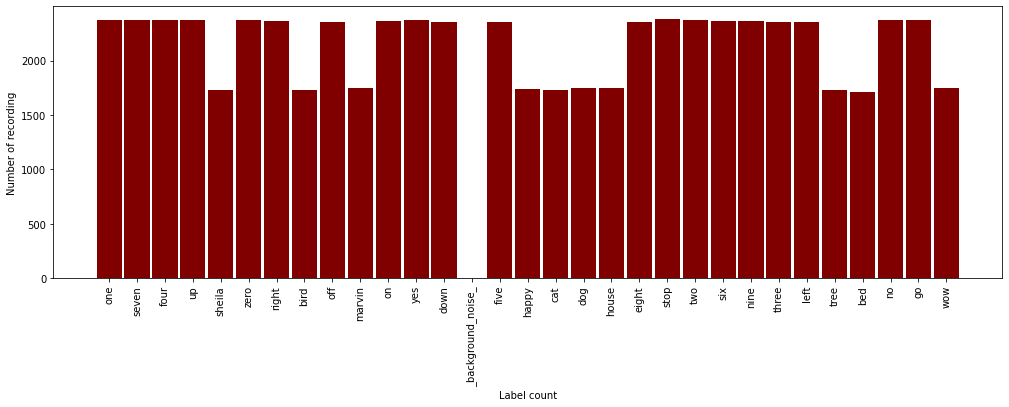

In [4]:
labels = []
count_labels = []
for path in source_data_path.iterdir():
    if path.is_dir():
        labels.append(path.name)
        count = len(list(path.glob('*.wav')))
        count_labels.append(count)
 
# creating the bar plot
fig = plt.figure(figsize = (17, 5))
plt.bar(labels, count_labels, color ='maroon',
        width = 0.9)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 12})
plt.xlabel("Label count")
plt.ylabel("Number of recording")
plt.show()

#### What we get
1. Dataset quite balace with most of class have 1500-2300 samples
2. The silence class only have 6 files
3. I also do random sampling to check for mislabel data => I dont found any mis-label samples

### Visualize Wave and spectrogram

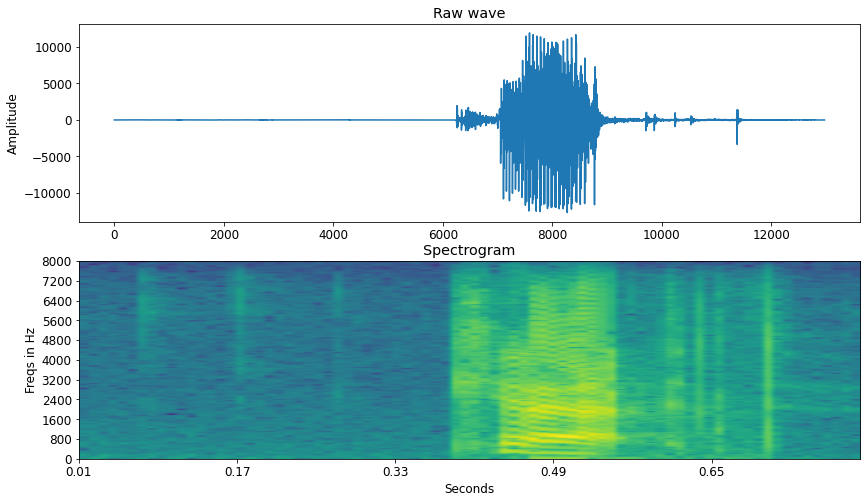

In [5]:
file = 'data/SpeechCommands/speech_commands_v0.01/cat/0ab3b47d_nohash_1.wav'
plot_audio(file)

In [6]:
# dataset structure
# waveform, sample_rate, label, speaker_id, utterance_number
train_ds = SPEECHCOMMANDS("./data", subset="training", url='speech_commands_v0.01')
test_ds = SPEECHCOMMANDS("./data", subset="testing", url='speech_commands_v0.01')
val_ds = SPEECHCOMMANDS("./data", subset="validation", url='speech_commands_v0.01')